# Functions

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [7]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [8]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [9]:
exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1208\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20211209\\'
direction = 'UR_DL'
ensure_dir(exp_folder+'MI')
ensure_dir(exp_folder+'MI\\Fig')
ensure_dir(exp_folder+'MI\\Fig\\perSpike')

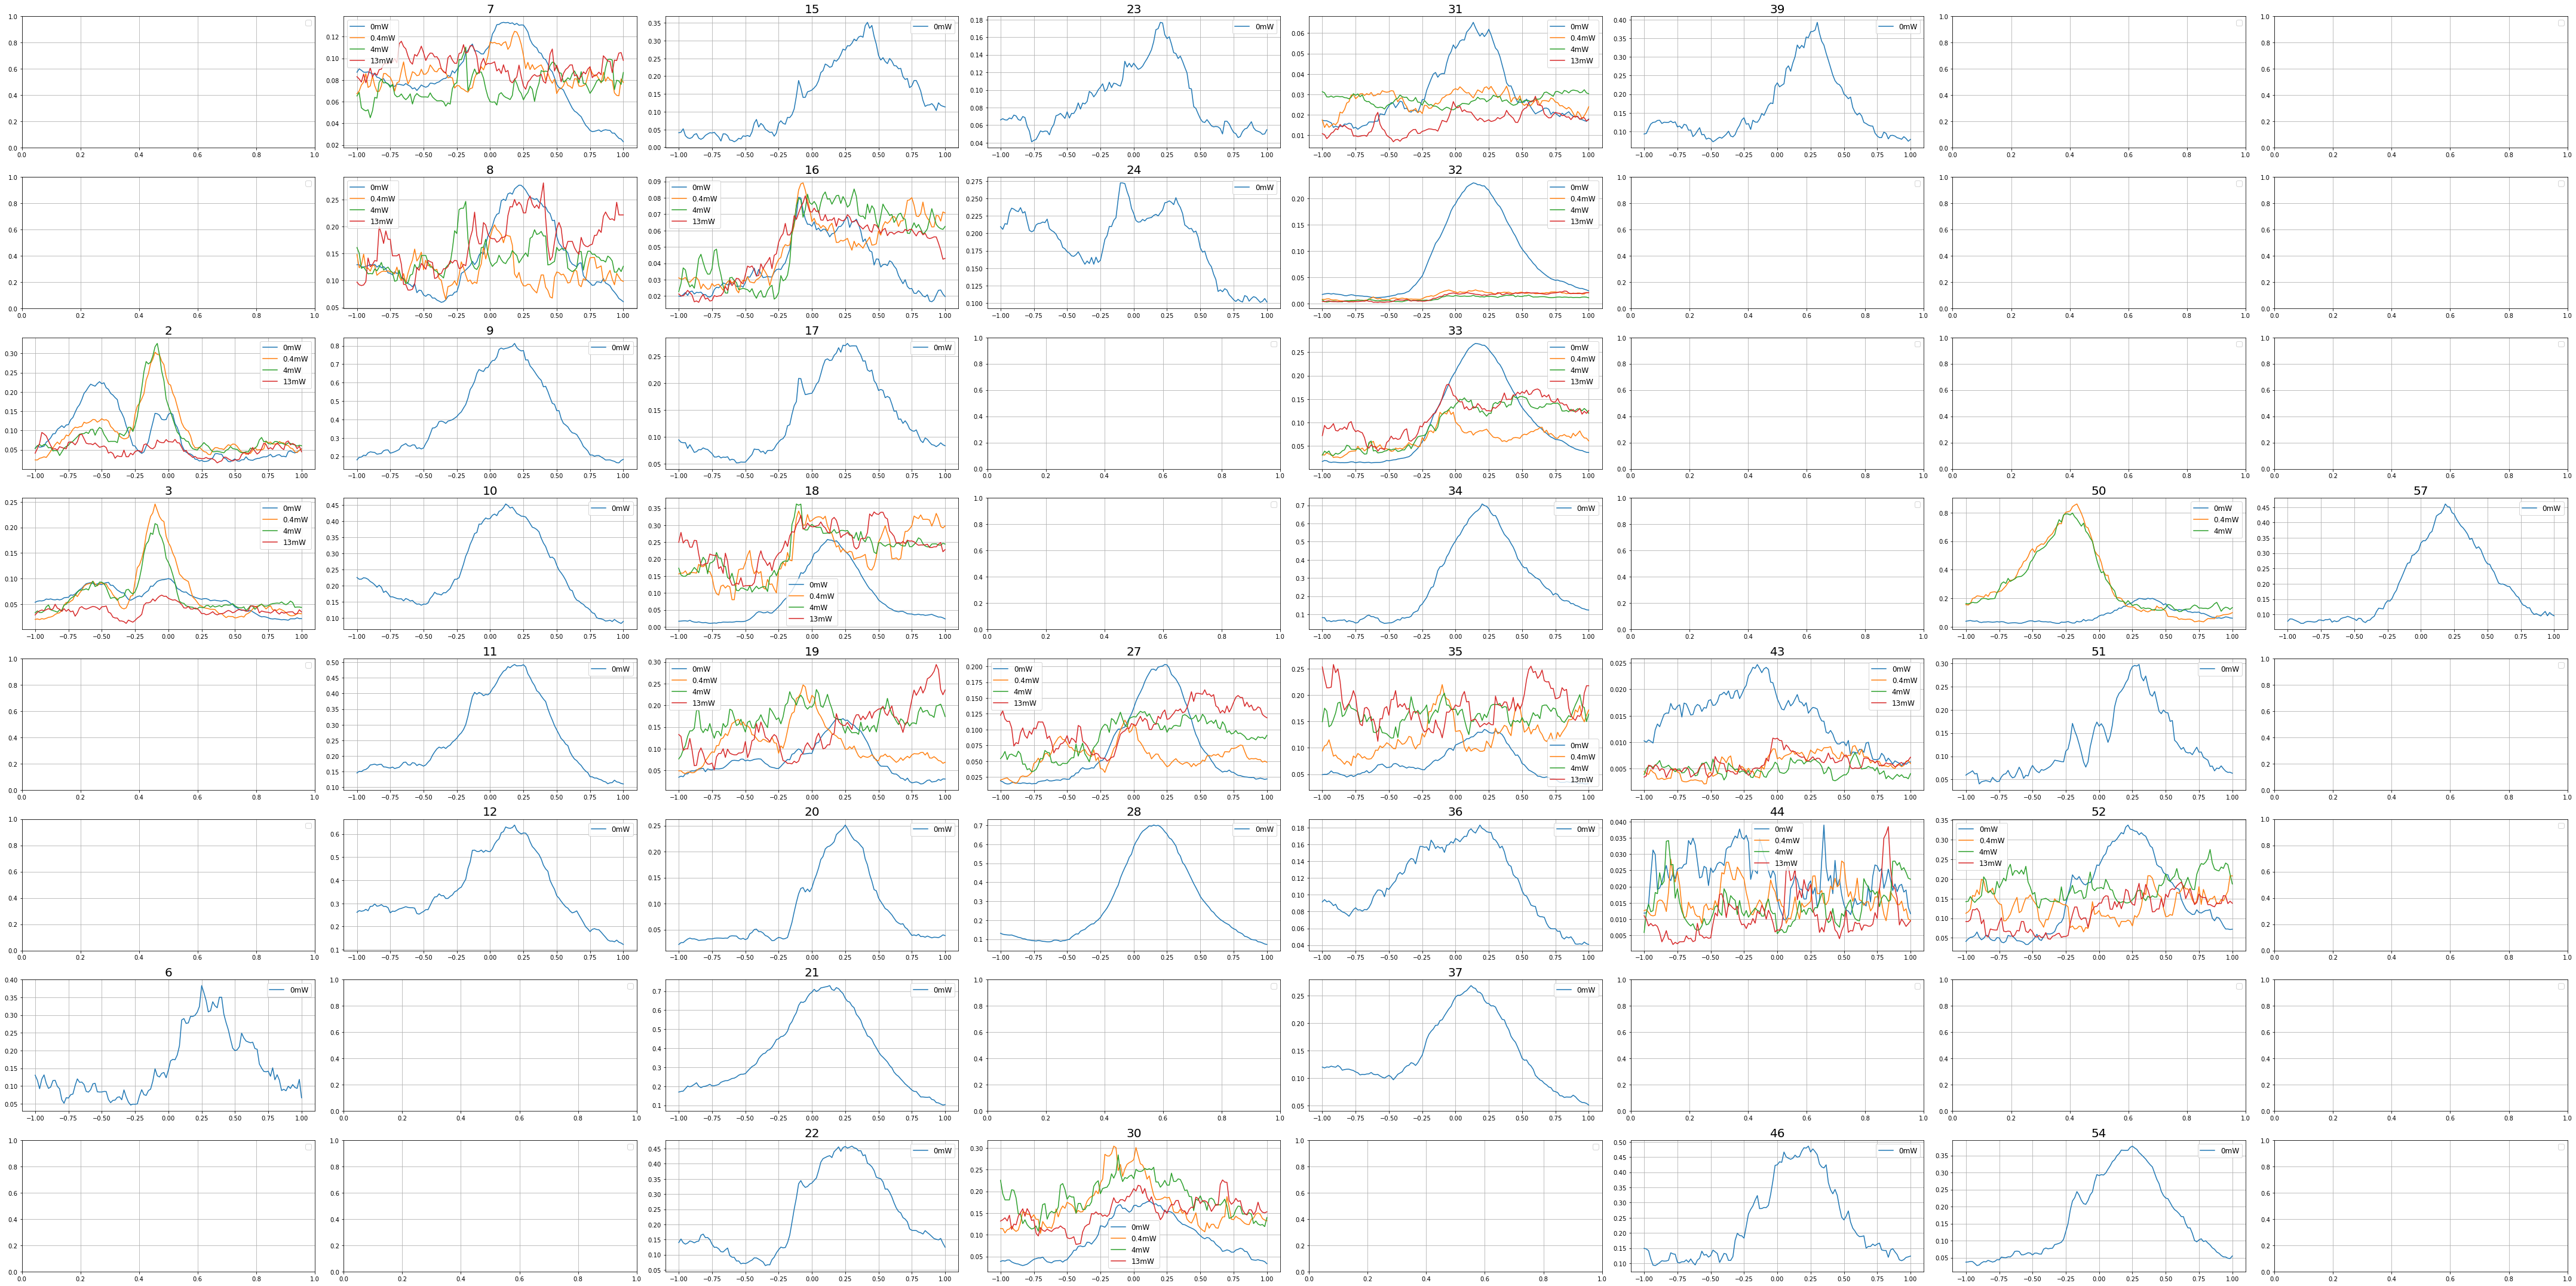

In [13]:
# bI = [0, 0.025, 0.04, 0.08, 0.1, 0.3, 0.5, 1, 2]
BarInten = 26
for Fc in [1]:
    MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
    cmind = 0
    for BackInten in [0,0.4,4,13]:
        if BackInten == 0:
            filename = 'merge_1209_LPOU_G4.5_1Hz_SW_hw8_long_'+direction+'_'+str(BarInten)+'v'+str(BackInten)+'mW'
        else:
            filename = 'merge_1207_LPOU_G4.5_1Hz_SW_hw8_long_'+direction+'_'+str(BarInten)+'v'+str(BackInten)+'mW'
        loadfiles = np.load(exp_folder+'MI\\MIperSpike_'+filename+'.npz', allow_pickle=True)
        for k in loadfiles.files:
            vars()[k] = loadfiles[k][()]

        for cn in range(60):
            Information = Information_cell[cn]
            try:
                MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,Information, label=str(BackInten)+'mW', color = plt.cm.tab10(cmind))
                MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
            except:
                continue
    #         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
    #         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
        cmind += 1

    for ax1d in MIdFcax:
        for ax in ax1d:
            ax.legend(fontsize = 12)
            ax.grid()
    MIdFcfig.set_size_inches(60, 30)
    MIdFcfig.tight_layout()
    MIdFcfig.savefig(exp_folder+'MI\\Fig\\perSpike\\dBackIn_BarIn='+str(BarInten)+'_'+str(Fc)+'Hz.tif', bbox_inches = 'tight',pad_inches = 0.3)